In [1]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import matplotlib.pyplot as plt

import logging
logging.getLogger("tensorflow").setLevel(logging.ERROR)
tf.autograph.set_verbosity(0)

np.set_printoptions(precision=2)

2023-11-23 06:39:56.507734: I external/local_tsl/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2023-11-23 06:39:56.533943: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2023-11-23 06:39:56.533974: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2023-11-23 06:39:56.534686: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-11-23 06:39:56.539044: I external/local_tsl/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2023-11-23 06:39:56.539692: I tensorflow/core/platform/cpu_feature_guard.cc:1

In [2]:
def my_softmax(z):
    """ Softmax converts a vector of values to a probability distribution.
    Args:
      z (ndarray (N,))  : input data, N features
    Returns:
      a (ndarray (N,))  : softmax of z
    """
    N = len(z)
    a = np.zeros(N)            # initialize a to zeros
    ez_sum = 0                 # initialize sum to zero
    for k in range(N):         # loop over number of outputs
        ez_sum += np.exp(z[k]) # sum exp(z[k]) to build the shared denominator
    for j in range(N):         # loop over number of outputs again
        a[j] =  np.exp(z[j])/ez_sum # divide each the exp of each output by the denominator
    return a

In [3]:
# load dataset
X = np.load("data/X_kannada_MNIST_train.npz")
X = X['arr_0']
X = X.reshape(len(X),-1)

y = np.load("data/y_kannada_MNIST_train.npz")
y = y['arr_0']

In [4]:
# Shuffle the dataset
np.random.seed(42)
shuffle_indices = np.random.permutation(len(X))
X = X[shuffle_indices]
y = y[shuffle_indices]

In [5]:
print("X.shape:",X.shape)
print("y.shape:",y.shape)

X.shape: (60000, 784)
y.shape: (60000,)


In [6]:
tf.random.set_seed(1234) # for consistent results
model = Sequential(
    [

        tf.keras.Input(shape=(784,)),
        Dense(units=25, activation='relu'),
        Dense(units=15, activation='relu'),
        Dense(units=10, activation='linear')
        
    ], name = "my_model"
)

2023-11-23 06:39:58.411117: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:901] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2023-11-23 06:39:58.428815: W tensorflow/core/common_runtime/gpu/gpu_device.cc:2256] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


In [7]:
model.summary()

Model: "my_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 25)                19625     
                                                                 
 dense_1 (Dense)             (None, 15)                390       
                                                                 
 dense_2 (Dense)             (None, 10)                160       
                                                                 
Total params: 20175 (78.81 KB)
Trainable params: 20175 (78.81 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [8]:
[layer1, layer2, layer3] = model.layers

In [9]:
#### Examine Weights shapes
W1,b1 = layer1.get_weights()
W2,b2 = layer2.get_weights()
W3,b3 = layer3.get_weights()
print(f"W1 shape = {W1.shape}, b1 shape = {b1.shape}")
print(f"W2 shape = {W2.shape}, b2 shape = {b2.shape}")
print(f"W3 shape = {W3.shape}, b3 shape = {b3.shape}")

W1 shape = (784, 25), b1 shape = (25,)
W2 shape = (25, 15), b2 shape = (15,)
W3 shape = (15, 10), b3 shape = (10,)


In [10]:
model.compile(
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
)

history = model.fit(
    X,y,
    epochs=10
)

Epoch 1/10
1875/1875 [==============================] - 2s 1ms/step - loss: 1.1844
Epoch 2/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2711
Epoch 3/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.1965
Epoch 4/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.1706
Epoch 5/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.1503
Epoch 6/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.1357
Epoch 7/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.1269
Epoch 8/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.1181
Epoch 9/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.1140
Epoch 10/10
1875/1875 [==============================] - 2s 999us/step - loss: 0.1063


In [15]:
random_index = np.random.randint(0,len(X))
image = X[random_index]
# display_digit(image_of_two)

prediction = model.predict(image.reshape(1,784))  # prediction

print(f" predicting a {y[random_index]}: \n{prediction}")
print(f" Largest Prediction index: {np.argmax(prediction)}")

1/1 [==============================] - 0s 14ms/step
 predicting a 9: 
[[ -9.63   9.39 -10.94  -4.99 -17.02 -25.62   3.96 -42.78  -4.25  22.67]]
 Largest Prediction index: 9


In [16]:
prediction_p = my_softmax(prediction)

print(f" predicting a Two. Probability vector: \n{prediction_p}")

yhat = np.argmax(prediction_p)
print(f"np.argmax(prediction_p): {yhat}")

 predicting a Two. Probability vector: 
[[9.30e-15 1.71e-06 2.53e-15 9.65e-13 5.79e-18 1.06e-21 7.47e-09 3.74e-29
  2.03e-12 1.00e+00]]
np.argmax(prediction_p): 9


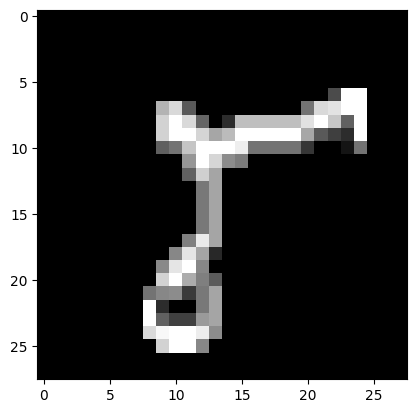

In [18]:
# Display the image
plt.imshow(image.reshape(28,28), cmap='gray')

In [14]:
model.save("models/my_model.h5")

/home/pradeep/miniconda3/envs/tf/lib/python3.9/site-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
